# MLDS workshop: Basics of CIFAR 10

## Welcome!
In this notebook, we will look at the basics of CIFAR-10.
Here is some stuff that we will be doing:
* Learn how to load data
* Look at how to visualize the data
* Do some image manipulation, like taking averages of images.
* Make a basic model and save our results.

## What's our task?
We want to be able to read in an image, and spit out what it is. It is guaranteed that the image is that of one of the following:

<img src='classes.png'>

## Why is this hard?
<img src='hard.png'>
Image credit: Dr. Fei-Fei Li, CS231N, Stanford University

## There is still hope!
If humans can do this, perhaps machines can too. We have gotten more than 95% accuracy in the past for CIFAR-10.

## Loading the data
For this section, we are assuming that you have the data saved in the same directory as this notebook, in a folder called `train`, and have the labels saved as `trainLables.csv`

Lets go ahead and install and import all the libraries which will come in handy for this task, as well as those which will be helpful when we are making the model and saving the results.

In [1]:
%matplotlib inline
!pip install pandas
!pip install scipy

In [2]:
import csv # for reading data
import pandas as pd # for manipulating data
from matplotlib import pyplot as plt
from scipy import misc
import numpy as np

Let's read in one sample image. Mode tells misc to convert the image to some format. L means black and white.

In [3]:
sample_img = misc.imread('train/5.png', mode='L') # Let's read in the 5th image.

(-0.5, 31.5, 31.5, -0.5)

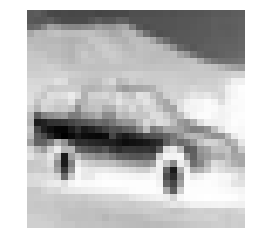

In [4]:
plt.imshow(sample_img, cmap='Greys') # cmap argument tells matplotlib how to render the image. I means black and white
plt.axis('off')

That's a car!

You know that. I know that. My computer though, does not know that. Well not yet.

Okay, let's see what the computer thinks this image is.

In [5]:
sample_img

array([[179, 177, 184, ..., 178, 176, 175],
       [179, 182, 181, ..., 175, 174, 172],
       [167, 162, 141, ..., 177, 175, 172],
       ..., 
       [ 80,  81,  82, ...,  74,  71,  64],
       [ 73,  74,  76, ...,  79,  74,  74],
       [ 72,  73,  73, ...,  78,  74,  76]], dtype=uint8)

That's a lot of numbers. Let's find out how many:

In [6]:
sample_img.shape

(32, 32)

Awesome, 32 pixels in width, 32 pixels in height, just as we expected.

Now, let's flip the image along the x axis and along the y axis, just so that we have a solid idea of how it is represented.

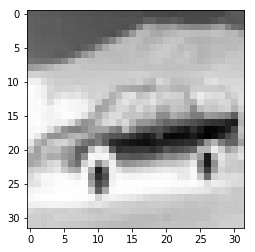

In [7]:
plt.imshow(np.fliplr(sample_img), cmap='Greys')

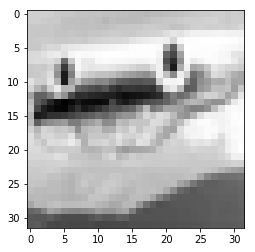

In [8]:
plt.imshow(np.flipud(sample_img), cmap='Greys')

Okay, got it, 2-D array of values. This was originally colored, in that case this would have been 3-D, with the third side encoding color.

Also, there is a lesson up there -- before you try doing anything yourself, check online to see if there is an existing library method to do it.

In [10]:
sample_img_color = misc.imread('train/5.png', mode='RGB')

You can read all about the useful routines available in scipy.misc at https://goo.gl/JMUzhk

Let's look at the color image

(-0.5, 31.5, 31.5, -0.5)

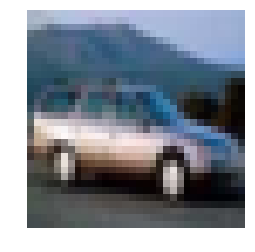

In [11]:
plt.imshow(sample_img_color)
plt.axis('off')

Let's look at how the color image is represented.

In [12]:
sample_img_color

array([[[170, 180, 198],
        [168, 178, 196],
        [177, 185, 203],
        ..., 
        [162, 179, 215],
        [158, 178, 214],
        [157, 177, 212]],

       [[168, 181, 198],
        [172, 185, 201],
        [171, 183, 200],
        ..., 
        [159, 177, 212],
        [156, 176, 211],
        [154, 174, 209]],

       [[154, 170, 186],
        [149, 165, 181],
        [129, 144, 162],
        ..., 
        [161, 178, 214],
        [157, 177, 212],
        [154, 174, 209]],

       ..., 
       [[ 74,  84,  80],
        [ 76,  85,  81],
        [ 78,  85,  82],
        ..., 
        [ 71,  75,  78],
        [ 68,  72,  75],
        [ 61,  65,  68]],

       [[ 68,  76,  77],
        [ 69,  77,  78],
        [ 72,  79,  78],
        ..., 
        [ 76,  80,  83],
        [ 71,  75,  78],
        [ 71,  75,  78]],

       [[ 67,  75,  78],
        [ 68,  76,  79],
        [ 69,  75,  76],
        ..., 
        [ 75,  79,  82],
        [ 71,  75,  78],
        [ 73,  77,

In [13]:
sample_img_color.shape

(32, 32, 3)

Awesome. That is 32x32 pixels, and three color channels per pixel (Red, Blue and Green).

So now that we know what the images look like, let's load the labels. They are stored in the same folder as trainLabels.csv. We are going to load this into a pandas dataframe. This is really easy -- you just say pd.read_csv.

In [14]:
labels = pd.read_csv('trainLabels.csv')

In [15]:
labels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


Now we are going to do something cool: we are going to build a massive pandas panel, where each "row" is a 2-D image, and the associated label. We are going to stick with greyscale for now.


In [16]:
# Read in all the images into a list
list_ = []
for i in np.arange(1, 50001):
    list_.append(misc.imread('train/' + str(i) + '.png', mode='I'))

In [17]:
# Convert the list into a panel
training_data = pd.Panel(list_)

Let's see 4 random images to see if the images and the labels match up.

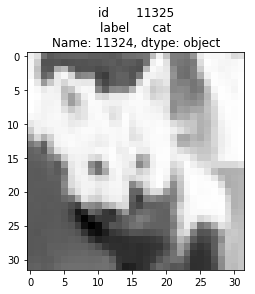

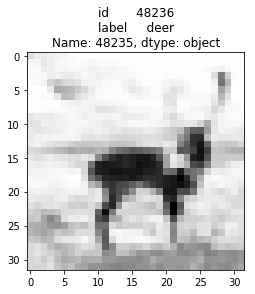

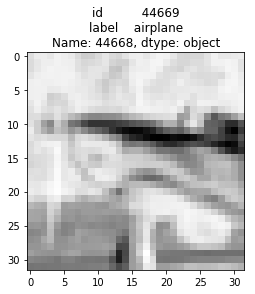

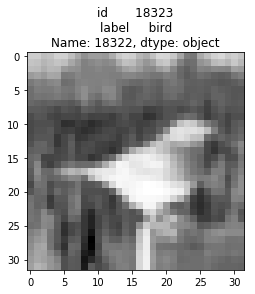

In [18]:
rand_indices = np.random.randint(1,50001, size=4)
for i, ix in enumerate(rand_indices): # enumerate is a python function which automatically creates a counter for you
    plt.figure(i)
    plt.imshow(training_data.iloc[ix], cmap='Greys')
    plt.title(labels.iloc[ix])
    plt.draw()

Awesome. Now, let's see how to get all the cats.

In [19]:
all_cats = training_data[labels['label'] == 'cat']

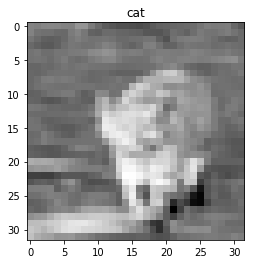

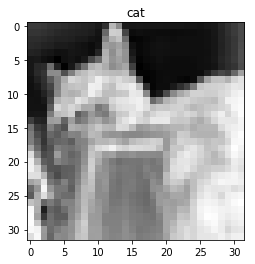

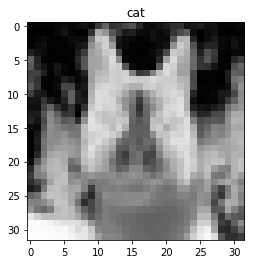

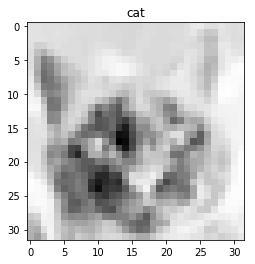

In [20]:
rand_indices = np.random.randint(1,len(all_cats), size=4)
for i, ix in enumerate(rand_indices):
    plt.figure(i)
    plt.imshow(all_cats.iloc[ix], cmap='Greys')
    plt.title('cat')
    plt.draw()

Let's see if we can average all cats

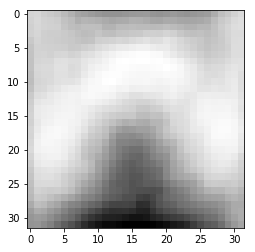

In [21]:
plt.imshow(all_cats.mean(axis=0), cmap='Greys')

Hmm, it is not just all a similar grey color throughout the photo. Seems like cat photos tend to be brighter in some places and darker in others. I wonder if this also holds true for other categories?

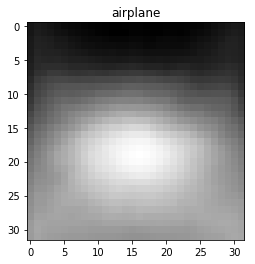

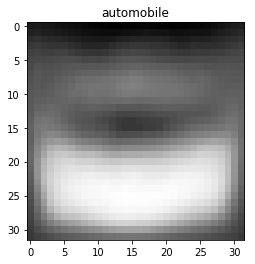

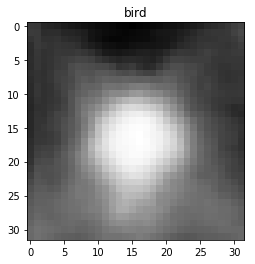

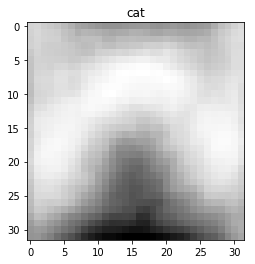

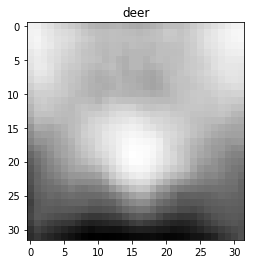

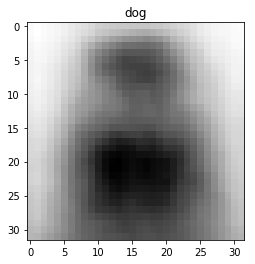

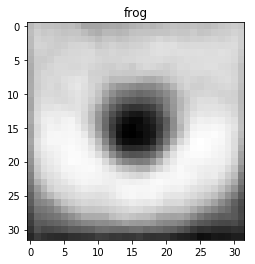

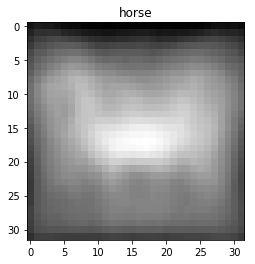

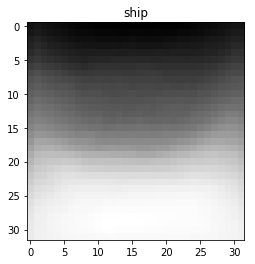

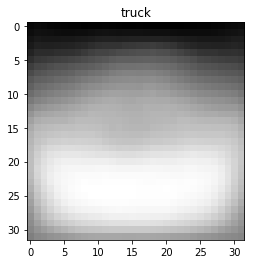

In [22]:
categories = ['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']
for i, category in enumerate(categories):
    imgs_in_category = training_data[labels['label'] == category]
    avg = imgs_in_category.mean(axis=0)
    plt.figure(i)
    plt.imshow(avg, cmap='Greys')
    plt.title(category)
    plt.draw()

That looks somewhat promising! This kind of makes sense: photos of different categories are on average quite dissimilar. So how about this: when we get a new image, we will compare it to the averages of images shown here. We will say that the image belongs to the category for which it lies closest to.

Also note how fast that was. We just averaged and plotted thousands of photos in a second! These libraries are usually written by PhDs in numerical computing, so I highly recommend sticking to them for high performance code.

Now, let's try taking advantage of the things that we just saw. We would like all teams to submit one model by the next meeting, to make sure that we are all set up and ready to go. The model that you should submit is described below. If you come up with something which does better than the one that we have described, go ahead and submit it :)

## Challenge 1: Use the average image to compute the class of an image

Since images from each class look slightly different, it might be worthwhile to use that to predict the classes of our images. The code snippets provided might help you in this.

Step 1: Compute the average image for each class. Much of this has been done for you.

Step 2: For each image in the test set, compute the sum of squared difference with the pixels of each "averaged" image. You will obtain 10 quantities. Assign the label to this test image which corresponds with the smallest difference.

Step 3: Put your results in a csv, upload it to kaggle, and add a screenshot to a folder with your code. Upload all this to github. Remember: you do NOT need to upload the data to github.

## For the go-getters

You might want to explore two more approaches

* Instead of taking the sum of the squared differences, take the two images you are comparing, flatten them into a single vector, and compute the angle between the two vectors. The smallest angle wins.

* Instead of computing averages, find the five images in the training set which are "closest" to the test image. You can define closest however you want -- sum of squared differences, angle between vectors etc. Warning: while this *might* give you better results, this approach will be quite slow.

## Sample code

### Computing sum of squared differences between two images

In [31]:
img1 = training_data.iloc[0]
img2 = training_data.iloc[1]
((img1 - img2)**2).sum().sum()

5074819

### Vectorizing an image

In [41]:
img1.stack()

0   0      61
    1      44
    2      48
    3      56
    4      78
    5      96
    6     112
    7     117
    8     123
    9     125
    10    108
    11    104
    12    120
    13    118
    14    111
    15    103
    16    112
    17    110
    18    101
    19    116
    20    115
    21    109
    22    110
    23    113
    24    126
    25    137
    26    142
    27    134
    28    135
    29    137
         ... 
31  2     146
    3     151
    4     166
    5     184
    6     185
    7     176
    8     161
    9     145
    10    136
    11    134
    12    134
    13    130
    14    122
    15    128
    16    131
    17    123
    18    112
    19    113
    20    117
    21    105
    22     93
    23     95
    24    102
    25     93
    26     72
    27     83
    28    144
    29    188
    30    123
    31     98
Length: 1024, dtype: int32

### Saving something to a csv

In [43]:
solution = [(i, 'cat') for i in np.arange(1, 50001)]

In [44]:
solution

[(1, 'cat'),
 (2, 'cat'),
 (3, 'cat'),
 (4, 'cat'),
 (5, 'cat'),
 (6, 'cat'),
 (7, 'cat'),
 (8, 'cat'),
 (9, 'cat'),
 (10, 'cat'),
 (11, 'cat'),
 (12, 'cat'),
 (13, 'cat'),
 (14, 'cat'),
 (15, 'cat'),
 (16, 'cat'),
 (17, 'cat'),
 (18, 'cat'),
 (19, 'cat'),
 (20, 'cat'),
 (21, 'cat'),
 (22, 'cat'),
 (23, 'cat'),
 (24, 'cat'),
 (25, 'cat'),
 (26, 'cat'),
 (27, 'cat'),
 (28, 'cat'),
 (29, 'cat'),
 (30, 'cat'),
 (31, 'cat'),
 (32, 'cat'),
 (33, 'cat'),
 (34, 'cat'),
 (35, 'cat'),
 (36, 'cat'),
 (37, 'cat'),
 (38, 'cat'),
 (39, 'cat'),
 (40, 'cat'),
 (41, 'cat'),
 (42, 'cat'),
 (43, 'cat'),
 (44, 'cat'),
 (45, 'cat'),
 (46, 'cat'),
 (47, 'cat'),
 (48, 'cat'),
 (49, 'cat'),
 (50, 'cat'),
 (51, 'cat'),
 (52, 'cat'),
 (53, 'cat'),
 (54, 'cat'),
 (55, 'cat'),
 (56, 'cat'),
 (57, 'cat'),
 (58, 'cat'),
 (59, 'cat'),
 (60, 'cat'),
 (61, 'cat'),
 (62, 'cat'),
 (63, 'cat'),
 (64, 'cat'),
 (65, 'cat'),
 (66, 'cat'),
 (67, 'cat'),
 (68, 'cat'),
 (69, 'cat'),
 (70, 'cat'),
 (71, 'cat'),
 (72, 'cat'),
 

In [47]:
with open('solution.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(('id', 'label'))
    writer.writerows(solution)